# Insurance Project

## Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
imblearn.__version__
%matplotlib inline
dataset = pd.read_csv('insurance.csv');

## Data Preprocessing and EDA

In [2]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
dataset.shape

(1338, 7)

In [9]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Histogram

In [10]:
dataset1= dataset.drop(columns=['sex','smoker','region'])

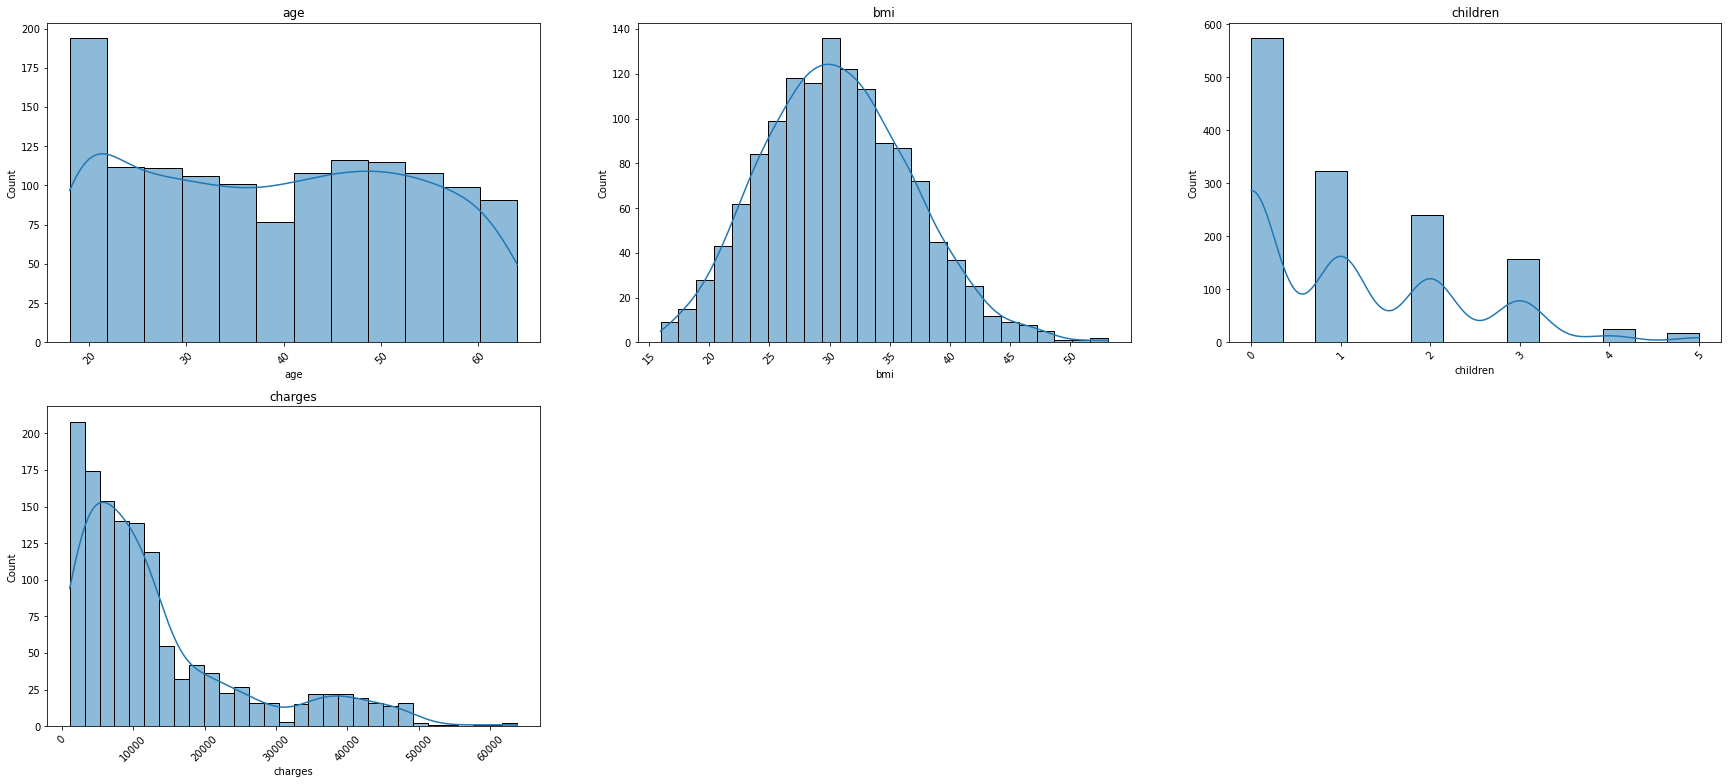

In [11]:
plt.figure(figsize=(30,20))
numeric_columns = df.select_dtypes(include=['number']).columns
for i,col in enumerate(numeric_columns,1):
    plt.subplot(3,3,i)
    sns.histplot(dataset1[col],kde =True)
    f= plt.gca()
    f.set_title(dataset1.columns.values[i-1])
    
    plt.xticks(rotation=45)

### Pie Plots

In [12]:
dataset2 = dataset[['sex','smoker','region']]

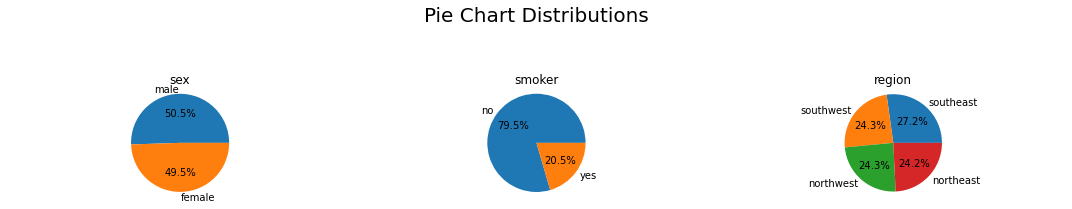

In [13]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,3,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


### Correlation

<AxesSubplot:title={'center':'Correlation with Response variable'}>

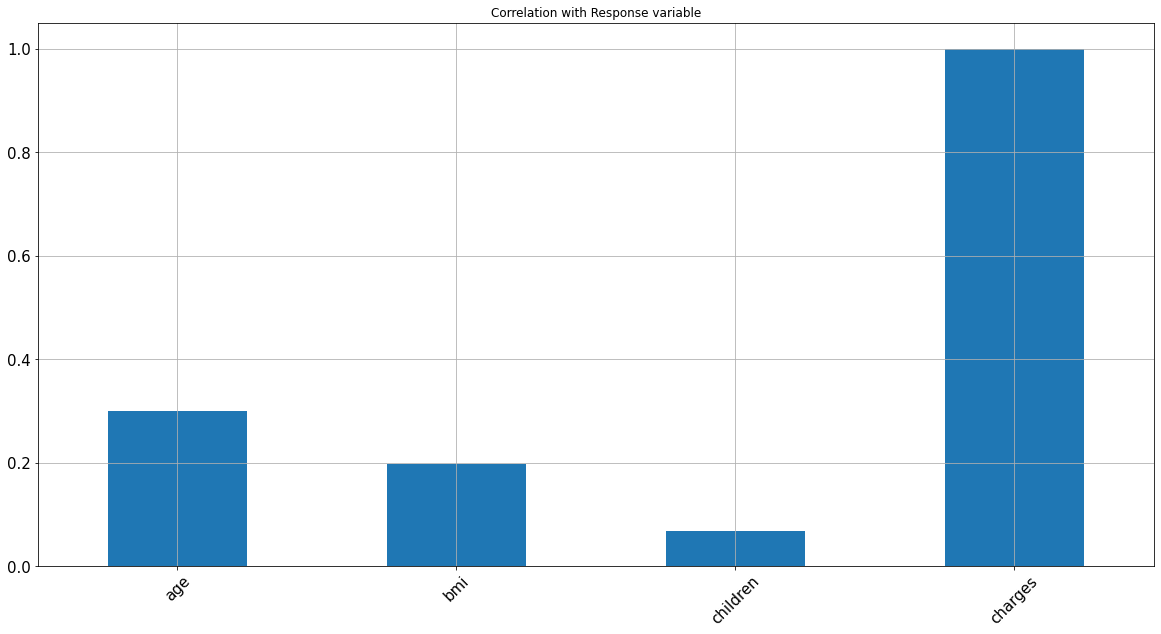

In [14]:
dataset1.corrwith(dataset['charges']).plot.bar(figsize=(20,10),title='Correlation with Response variable',fontsize =15, rot =45,grid=True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_3636\3207554949.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


<AxesSubplot:>

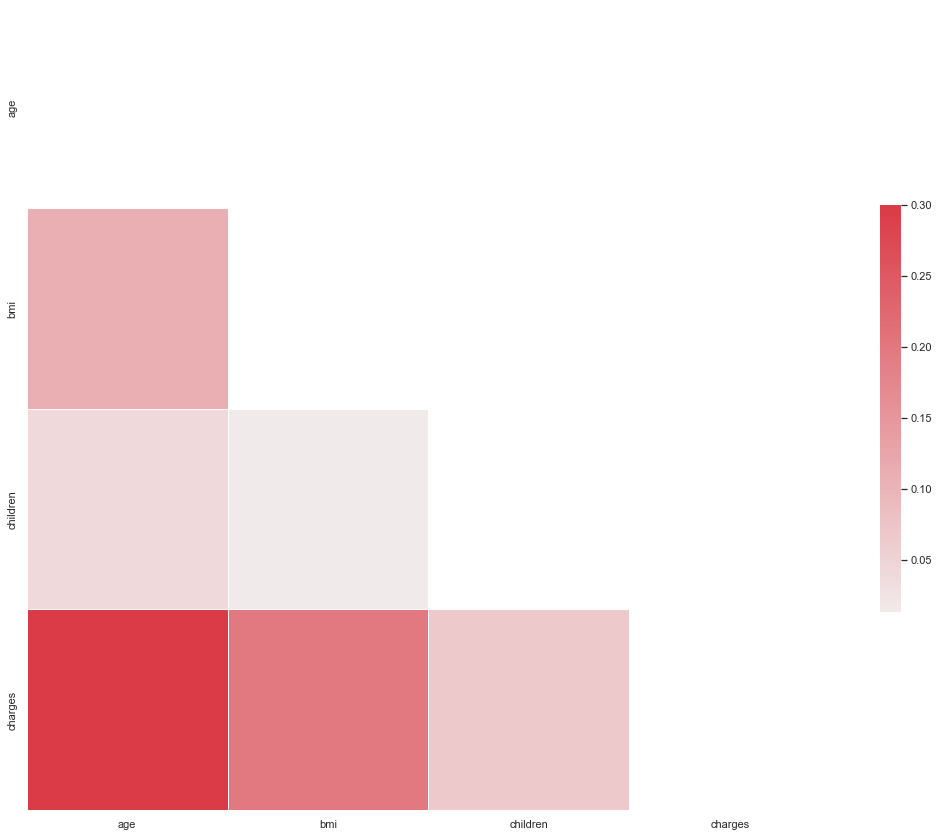

In [15]:
corr = dataset1.corr()
sns.set(style='white')
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax =plt.subplots(figsize=(18,15))
cmap =sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

### Box Plots

C:\Users\f5481198\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\f5481198\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\f5481198\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\f5481198\Anac

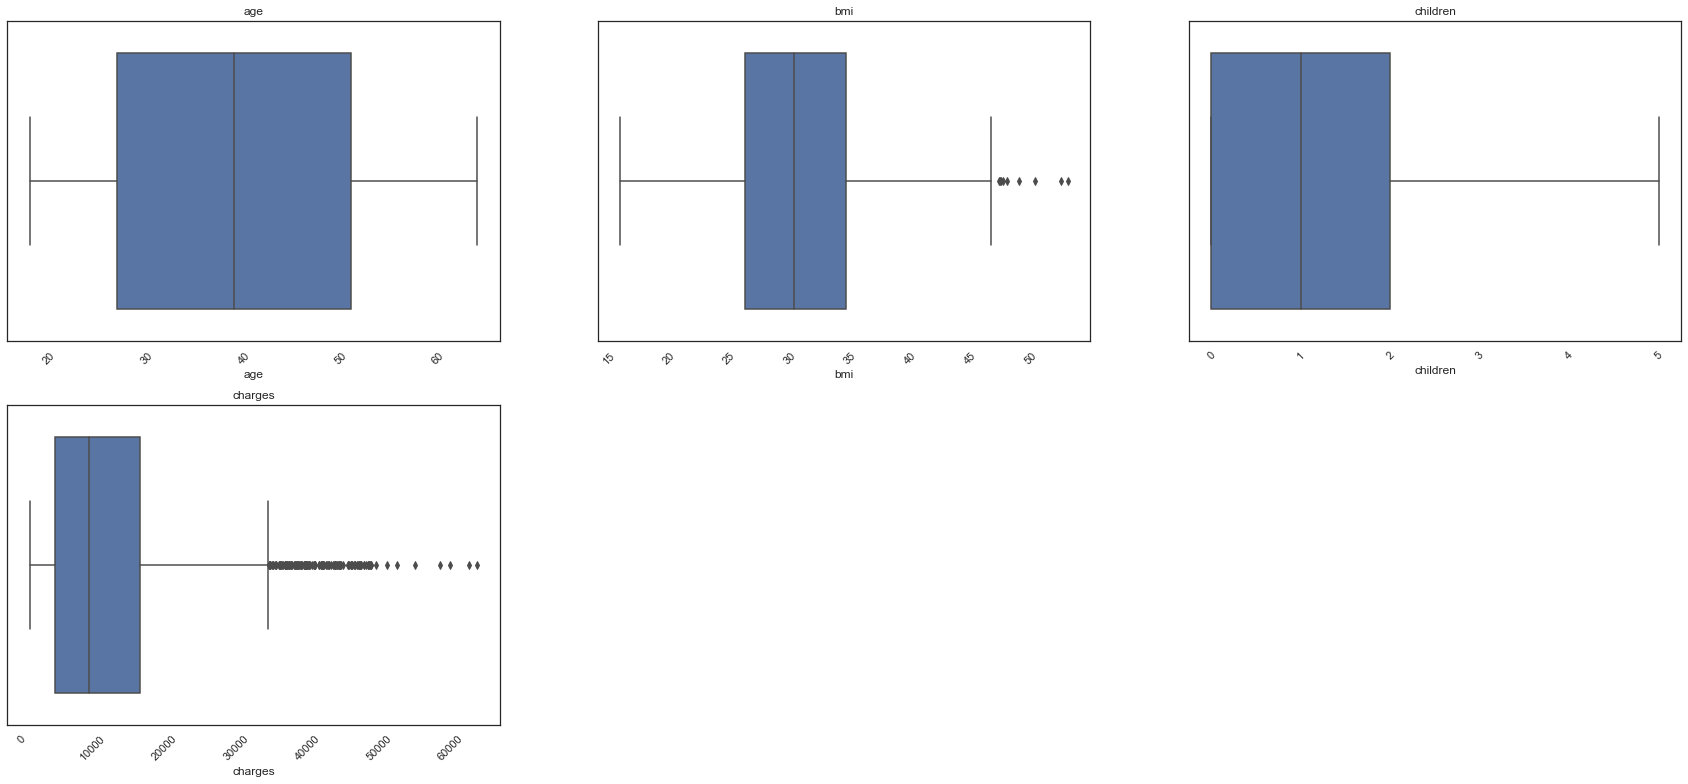

In [16]:
plt.figure(figsize=(30,20))
for i,col in enumerate(dataset1.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(dataset1[col])
    f= plt.gca()
    f.set_title(dataset1.columns.values[i-1])
    
    plt.xticks(rotation=45)

### Labal Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex']=le.fit_transform(dataset['sex'])
dataset['smoker']=le.fit_transform(dataset['smoker'])
dataset['region']=le.fit_transform(dataset['region'])


In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Splitting data into train and Test data

In [19]:
X= dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [20]:
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

## Model Building

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
LR=lr.fit(X_train,y_train)

In [26]:
y_pred=LR.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 =r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
model_results = pd.DataFrame([['Linear Regression ', r2, MAE, MSE]],
               columns = ['Model', 'r2 Score', 'Mean Absolute Error','Mean Squared Error'])
results = model_results

In [27]:
results

,Model,r2 Score,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.79565,4017.819877,3.217170e+07


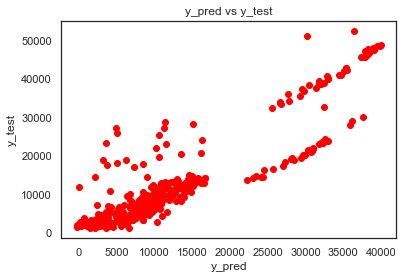

In [28]:
plt.scatter(y_pred,y_test, color= 'red')
plt.title('y_pred vs y_test')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

### Surppot Vector Machine Regression

In [29]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
SVC= svr.fit(X_train,y_train)

In [30]:
y_pred=SVC.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 =r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
model_results = pd.DataFrame([['SVC ', r2, MAE, MSE]],
               columns = ['Model', 'r2 Score', 'Mean Absolute Error','Mean Squared Error'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_3636\1515276917.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [31]:
results

,Model,r2 Score,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.795650,4017.819877,3.217170e+07
1,SVC,-0.093838,8539.744483,1.722079e+08


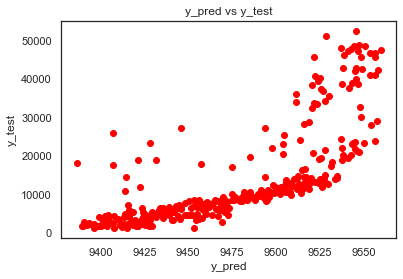

In [32]:
plt.scatter(y_pred,y_test, color= 'red')
plt.title('y_pred vs y_test')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

### Decision Tree Regression 

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
DTR=dtr.fit(X_train,y_train)

In [34]:
y_pred=DTR.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 =r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
model_results = pd.DataFrame([['Decision Tree Regressor ', r2, MAE, MSE]],
               columns = ['Model', 'r2 Score', 'Mean Absolute Error','Mean Squared Error'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_3636\2800558178.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [40]:
results

,Model,r2 Score,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.795650,4017.819877,3.217170e+07
1,SVC,-0.093838,8539.744483,1.722079e+08
2,Decision Tree Regressor,0.683059,3392.320271,4.989751e+07
3,Random Forest Regressor,0.851574,2790.150405,2.336734e+07


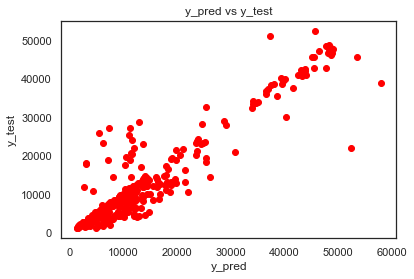

In [41]:
plt.scatter(y_pred,y_test, color= 'red')
plt.title('y_pred vs y_test')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

### Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=10, random_state= 0)
RFR=rfr.fit(X_train,y_train)

In [38]:
y_pred=RFR.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 =r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
model_results = pd.DataFrame([['Random Forest Regressor ', r2, MAE, MSE]],
               columns = ['Model', 'r2 Score', 'Mean Absolute Error','Mean Squared Error'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_3636\2717559153.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [42]:
results

,Model,r2 Score,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.795650,4017.819877,3.217170e+07
1,SVC,-0.093838,8539.744483,1.722079e+08
2,Decision Tree Regressor,0.683059,3392.320271,4.989751e+07
3,Random Forest Regressor,0.851574,2790.150405,2.336734e+07


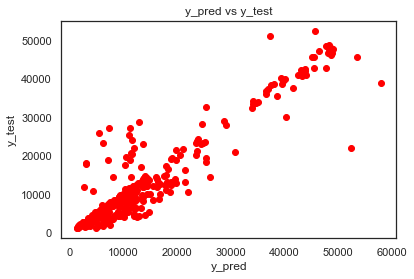

In [43]:
plt.scatter(y_pred,y_test, color= 'red')
plt.title('y_pred vs y_test')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()